In [1]:
import numpy as np
import pandas as pd

In [89]:
#csv파일을 읽어와서 npy로 변환 / 데이터셋 생성과정에서 npy로 변환하여 저장하는 것이 좋을듯
e_data = pd.read_csv('./dataset/e_data.csv', header=None)
i_data = pd.read_csv('./dataset/i_data.csv', header=None)
l_data = pd.read_csv('./dataset/l_data.csv', header=None)
o_data = pd.read_csv('./dataset/o_data.csv', header=None)
u_data = pd.read_csv('./dataset/u_data.csv', header=None)
v_data = pd.read_csv('./dataset/v_data.csv', header=None)
y_data = pd.read_csv('./dataset/y_data.csv', header=None)

e_train_data = np.array(e_data)
i_train_data = np.array(i_data)
l_train_data = np.array(l_data)
o_train_data = np.array(o_data)
u_train_data = np.array(u_data)
v_train_data = np.array(v_data)
y_train_data = np.array(y_data)

#csv파일을 npy로 변환하여 concatnate

data = np.concatenate((e_train_data,
                       i_train_data,
                       l_train_data,
                       o_train_data,
                       u_train_data,
                       v_train_data,
                       y_train_data), axis=0)

gesture = ['e', 'i', 'l', 'o', 'u', 'v', 'y']

print(data.shape)
print(len(gesture))

(700, 16)
7


In [90]:
x_data = data[:,:-1]
labels = data[:,-1]

print(x_data.shape)
print(labels.shape)

(700, 15)
(700,)


In [95]:
#one-hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y_data = enc.fit_transform(labels.reshape(-1,1)).toarray()

print(y_data.shape)

print(y_data[0])

(700, 7)
[1. 0. 0. 0. 0. 0. 0.]


In [96]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

print(x_data_train.shape, x_data_test.shape)
print(y_data_train.shape, y_data_test.shape) 
print(x_data_train[0])
print(y_data_train[0])

(560, 15) (140, 15)
(560, 7) (140, 7)
[ 32.26196   32.46696   52.30912   35.809452 110.70617   16.091784
  35.10207  134.61842   21.92899   34.592102 130.40651   20.823494
  21.59623  139.7958    15.87289 ]
[1. 0. 0. 0. 0. 0. 0.]


In [100]:
#KNN 모델 TEST
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(x_data_train, y_data_train)

y_pred = knn.predict(x_data_test)

y_pred1 = knn.predict([[20,36,22,13,2,3,7,4,3,20,150,9,33,138,9]]) #u

y_pred2 = knn.predict([[25,40,11,10,2,1,8,2,5,21,150,12,5,160,7]]) #v

print(knn.score(x_data_test, y_data_test))
print(y_pred1)
print(y_pred2) 

0.9785714285714285
[[0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0.]]


In [138]:
#Sequential Model TEST
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


model = Sequential()
model.add(Dense(64, input_shape=(15,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(7, activation='softmax'))

model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 64)                1024      
                                                                 
 dense_119 (Dense)           (None, 32)                2080      
                                                                 
 dense_120 (Dense)           (None, 7)                 231       
                                                                 
Total params: 3,335
Trainable params: 3,335
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# history = model.fit(x_data_train, y_data_train, epochs=200, batch_size=8)

# test_loss, test_acc = model.evaluate(x_data_test, y_data_test)

# loss = history.history['loss']
# acc = history.history['accuracy']
# epochs = range(1, len(loss)+1)

# plt.plot(epochs, loss, 'r', label='Loss')
# plt.plot(epochs, acc, 'g', label='Accuracy')
# plt.legend()
# plt.xlabel('epochs')
# plt.ylabel('loss/acc')
# plt.show()

# print("loss : ", test_loss)
# print("acc : ", test_acc)

# y_pred1 = model.predict([[20,36,22,13,2,3,7,4,3,20,150,9,33,138,9]]) #u

# y_pred2 = model.predict([[25,40,11,10,2,1,8,2,5,21,150,12,5,160,7]]) #v

# print(np.round(y_pred1)) #[[0. 0. 0. 0. 1. 0. 0.]]
# print(np.round(y_pred2)) #[[0. 0. 0. 0. 0. 1. 0.]]

Epoch 1/10000
44/53 [=======================>......] - ETA: 0s - loss: 4.6070 - accuracy: 0.5994  
Epoch 1: val_loss improved from inf to 0.13526, saving model to ./model/01model.hdf5
53/53 [==============================] - 1s 5ms/step - loss: 3.9040 - accuracy: 0.6429 - val_loss: 0.1353 - val_accuracy: 0.9286
Epoch 2/10000
34/53 [==================>...........] - ETA: 0s - loss: 0.2287 - accuracy: 0.8934
Epoch 2: val_loss improved from 0.13526 to 0.09010, saving model to ./model/02model.hdf5
53/53 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.8976 - val_loss: 0.0901 - val_accuracy: 0.9786
Epoch 3/10000
31/53 [================>.............] - ETA: 0s - loss: 0.2869 - accuracy: 0.8548
Epoch 3: val_loss did not improve from 0.09010
53/53 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.8738 - val_loss: 0.1770 - val_accuracy: 0.9143
Epoch 4/10000
33/53 [=================>............] - ETA: 0s - loss: 0.1539 - accuracy: 0.9280
Ep

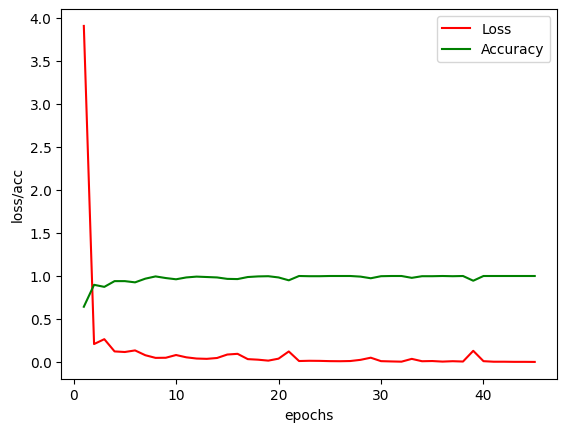

loss :  0.006648768205195665
acc :  1.0
1/1 [==============================] - 0s 41ms/step
[[0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0.]]


In [139]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

modelpath = "./model/{epoch:02d}model.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(x_data_train, y_data_train, validation_split=0.25, epochs=10000, batch_size=8,
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

test_loss, test_acc = model.evaluate(x_data_test, y_data_test)

loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r', label='Loss')
plt.plot(epochs, acc, 'g', label='Accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

print("loss : ", test_loss)
print("acc : ", test_acc)

y_pred1 = model.predict([[20,36,22,13,2,3,7,4,3,20,150,9,33,138,9]]) #u

y_pred2 = model.predict([[25,40,11,10,2,1,8,2,5,21,150,12,5,160,7]]) #v

print(np.round(y_pred1)) #[[0. 0. 0. 0. 1. 0. 0.]]
print(np.round(y_pred2)) #[[0. 0. 0. 0. 0. 1. 0.]]

In [137]:
del model